In [1]:
# Imports.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import csv

from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

# 1. Part one

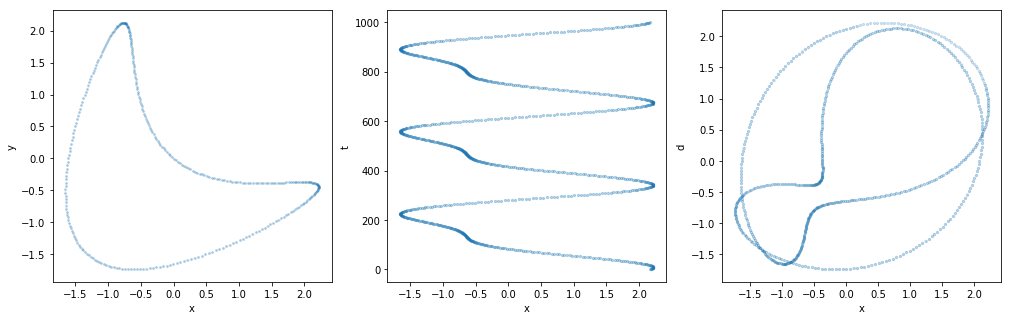

In [2]:
# Retrieving data & data visualization.
data = np.loadtxt('takens_1.txt')
size = 8
fig = plt.figure(figsize=(17,5))
ax = fig.add_subplot(131)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.scatter(data[:, 0], data[:, 1], s=3, alpha=0.1)
scl = 5

# First coordinate against "time".
ax = fig.add_subplot(132)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.scatter(data[:, 0], range(data.shape[0]), s=scl, alpha=0.3)

# First coordinate against n-delayed first coordinate.
n = 50
x = data[:(data.shape[0]-n)]
d = data[n:]
ax = fig.add_subplot(133)
ax.set_xlabel('x')
ax.set_ylabel('d')
ax.scatter(x, d, s=scl, alpha=0.1)

plt.show()

# 2. Part two

## 2.1 x-coordinate

### 2.1.1 Calculation

In [3]:
# Original.
# Lorenz equations (vectorized).
def vec_lor(t, vec, sigma, beta, rho):
    x = vec[0]
    y = vec[1]
    z = vec[2]
    dx = sigma*(y-x)
    dy = x*(rho-z)-y
    dz = x*y - beta*z
    return np.array([dx, dy, dz])

# Configuration.
sigma = 10.
beta = 8./3.
rho = 28.

T_end = 1000.
tspan = (0., T_end)
teval = np.arange(tspan[0], tspan[1], 0.001)

# Trajectory with x0 = (10, 10, 10).
x0 = np.array([10., 10., 10.])
sol = solve_ivp(lambda t, x: vec_lor(t, x, sigma, beta, rho), tspan, x0, t_eval=teval)


# Time-delay.
x = sol.y[0]
n = 75
range_x1 = range(0, x.shape[0] - 2*n)
range_x2 = range(n, x.shape[0] - n)
range_x3 = range(2*n, x.shape[0])
x1 = x[range_x1]
x2 = x[range_x2]
x3 = x[range_x3]

### 2.1.2 Visualization

0


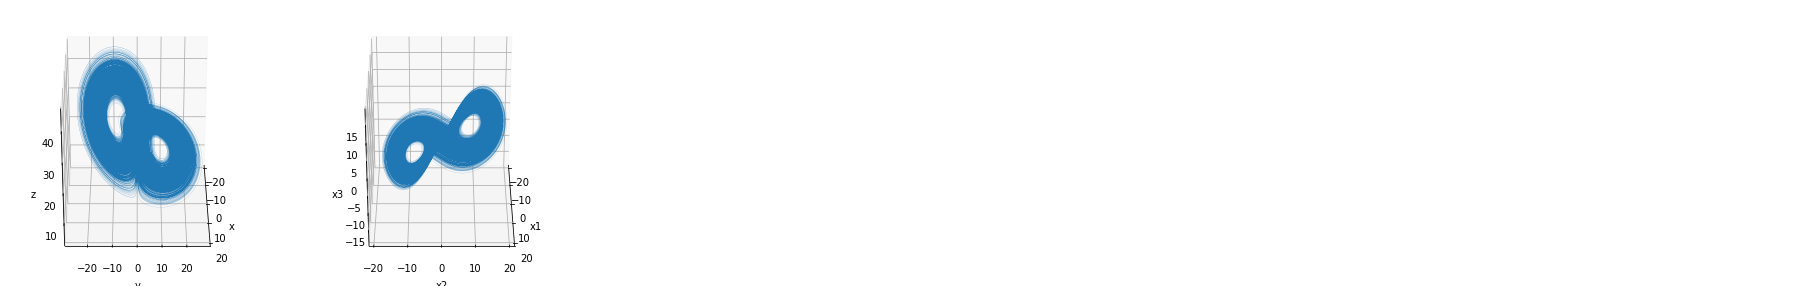

30


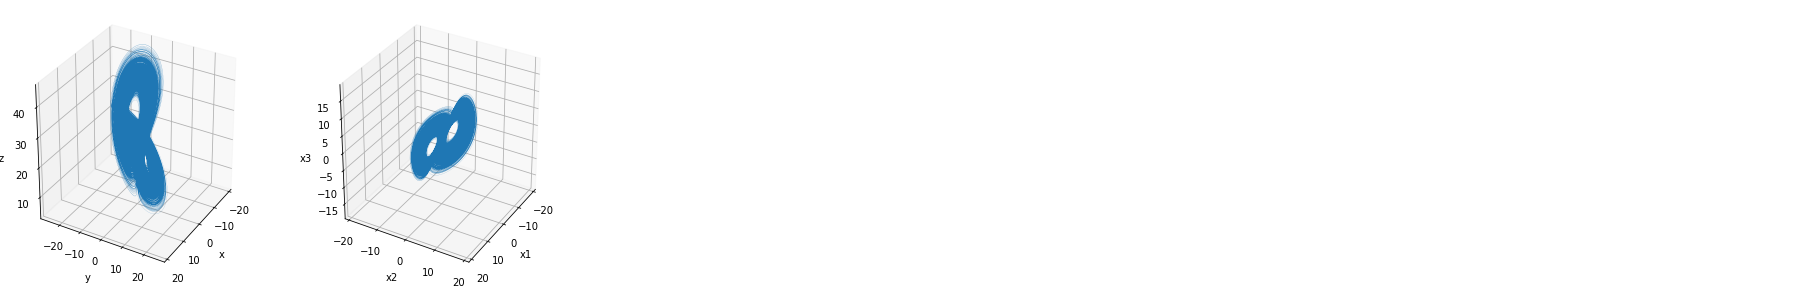

60


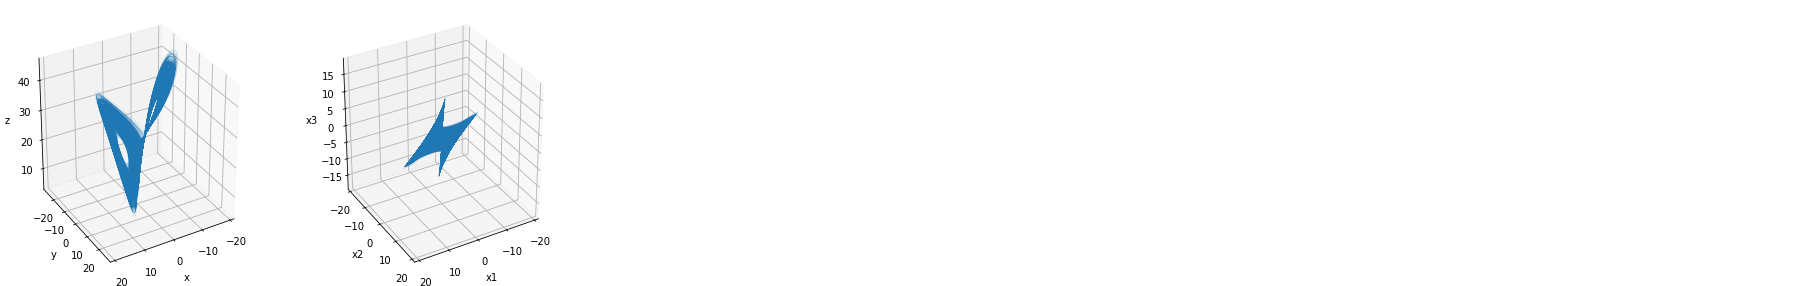

90


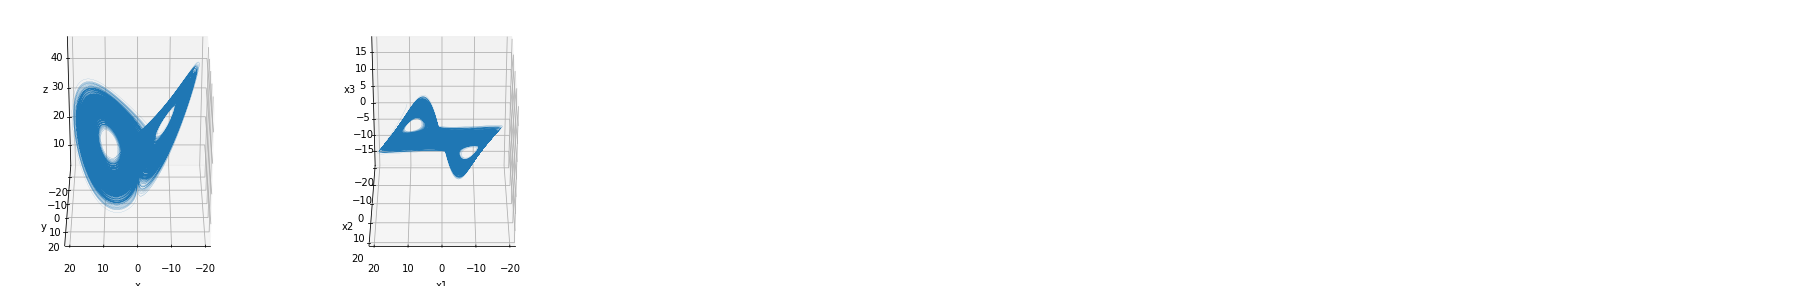

120


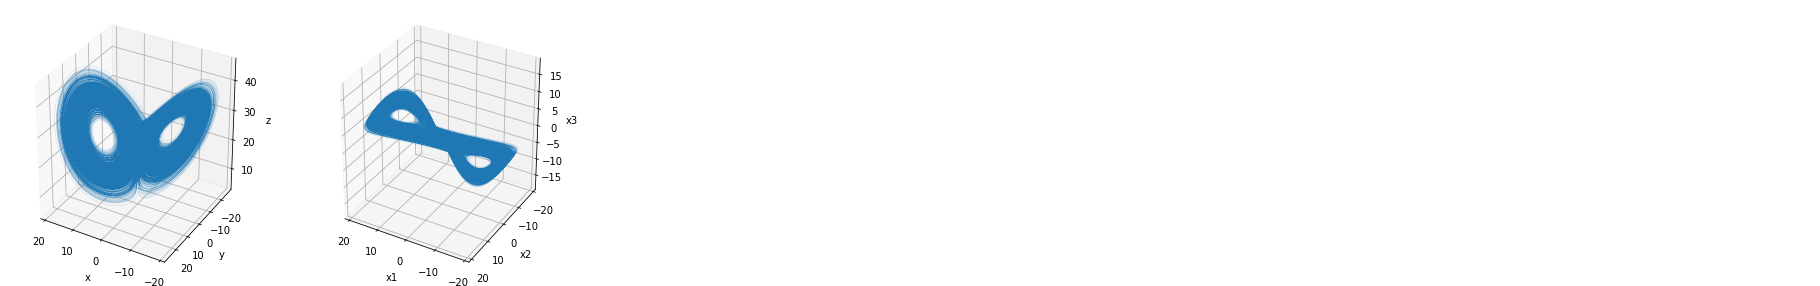

150


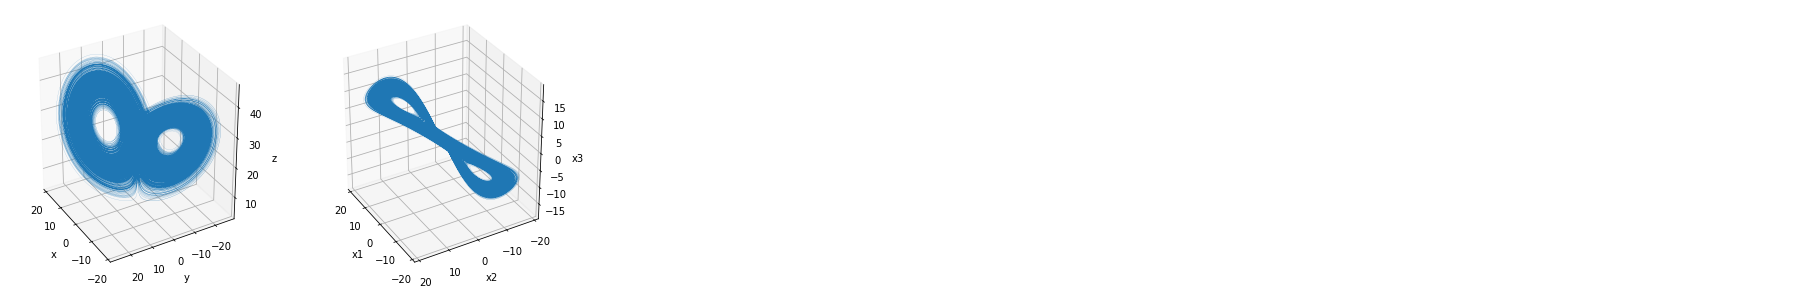

180


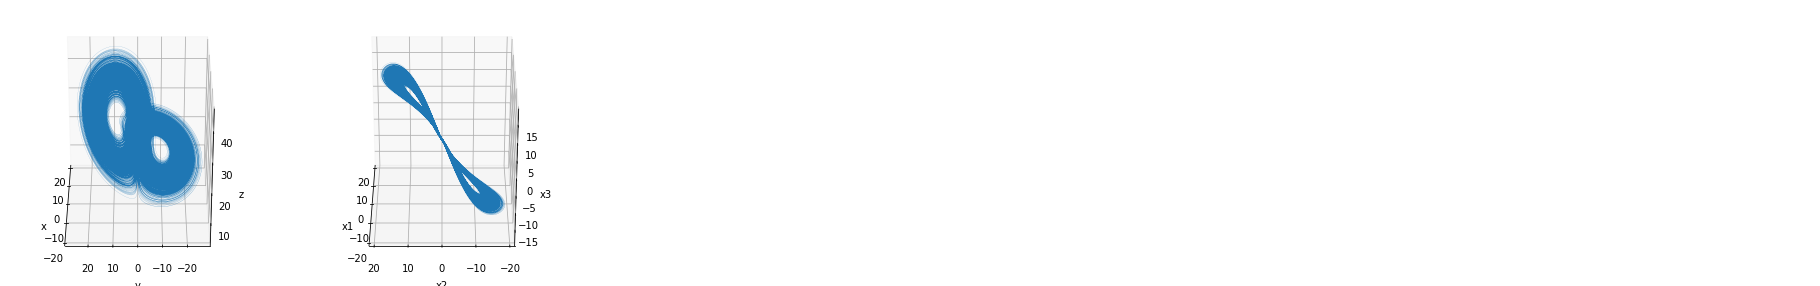

210


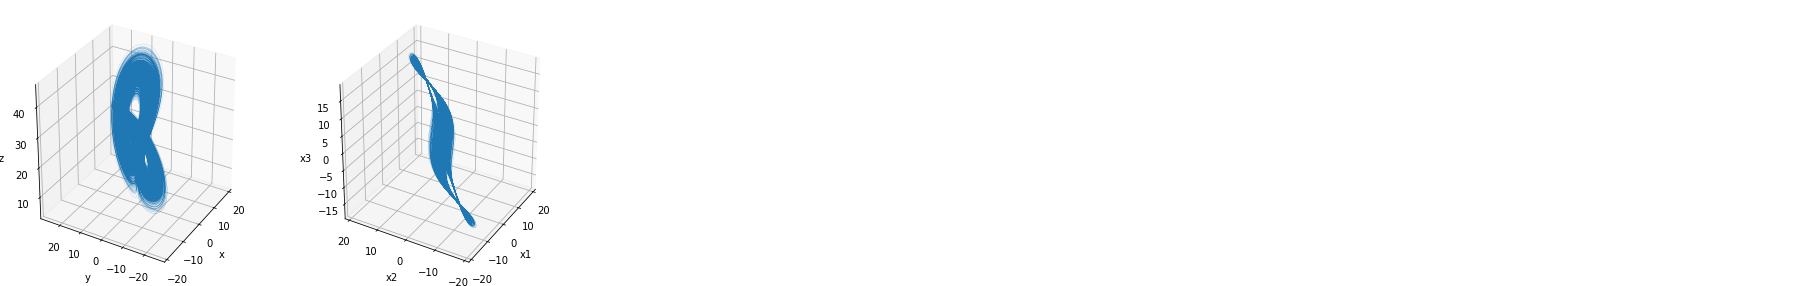

240


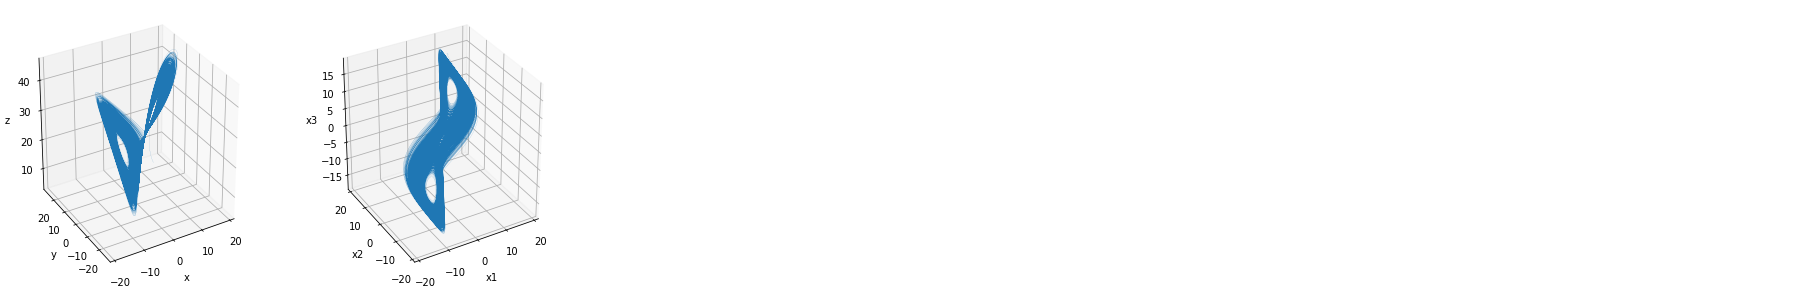

270


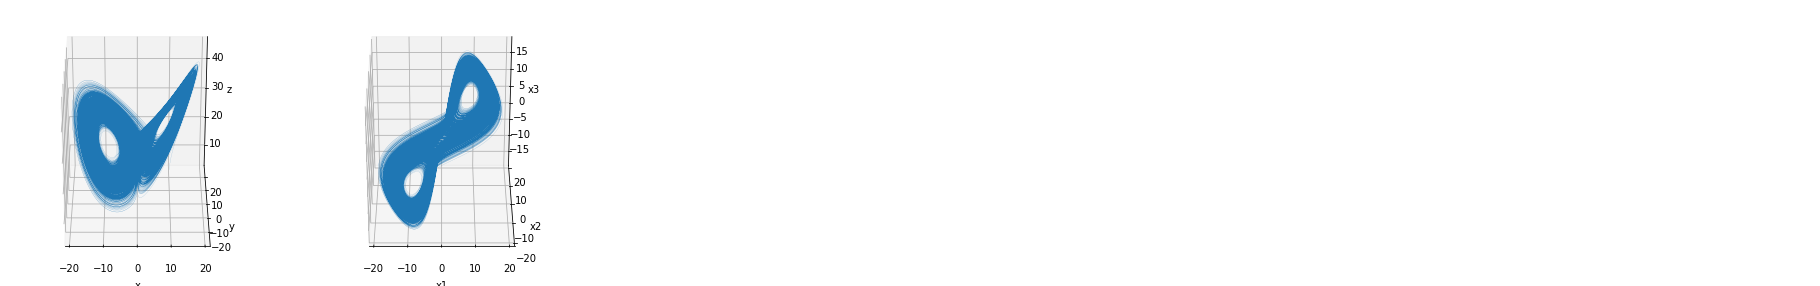

300


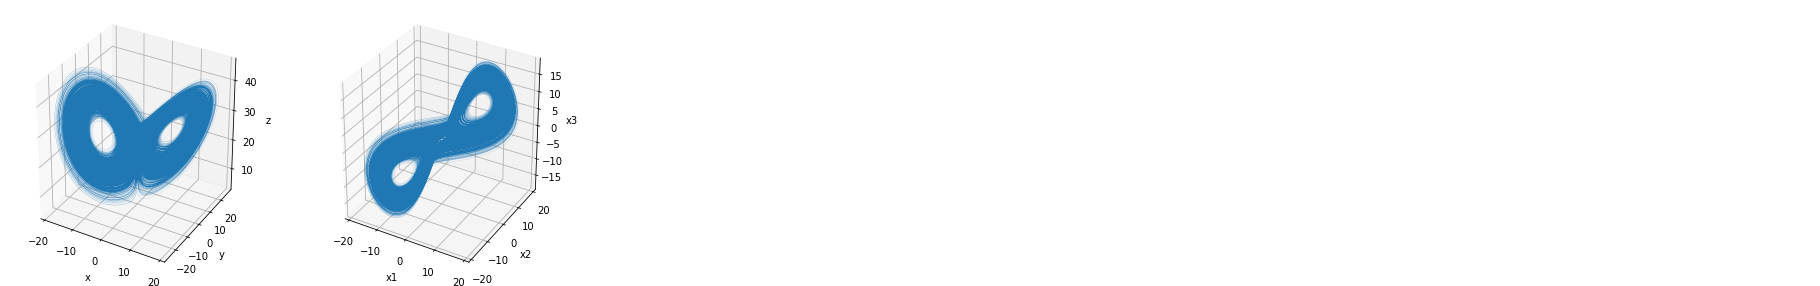

330


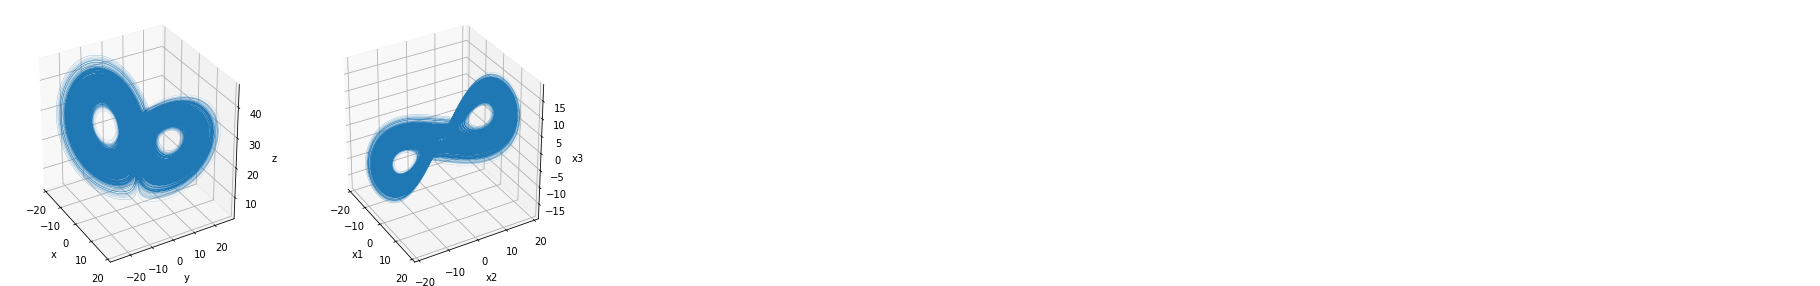

In [4]:
for angle in range(0, 360):
    if angle % 30 !=0: continue
    print(angle)
    # Original.
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(121, projection='3d')
    ax.view_init(30, angle)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.plot(sol.y[0], sol.y[1], sol.y[2], lw=0.1)
    
    #Time-delay.
    ax = fig.add_subplot(122, projection='3d')
    ax.view_init(30, angle)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("x3")
    ax.plot(x1, x2, x3, lw=0.1)
    
    plt.show()

## 2.2 z-coordinate

### 2.2.1 Calculation

In [5]:
# Original. (nothing to do here)

# Time-delay.
z = sol.y[2]
n = 75
range_z1 = range(0, z.shape[0] - 2*n)
range_z2 = range(n, z.shape[0] - n)
range_z3 = range(2*n, z.shape[0])
z1 = z[range_z1]
z2 = z[range_z2]
z3 = z[range_z3]

### 2.2.2 Visualization

0


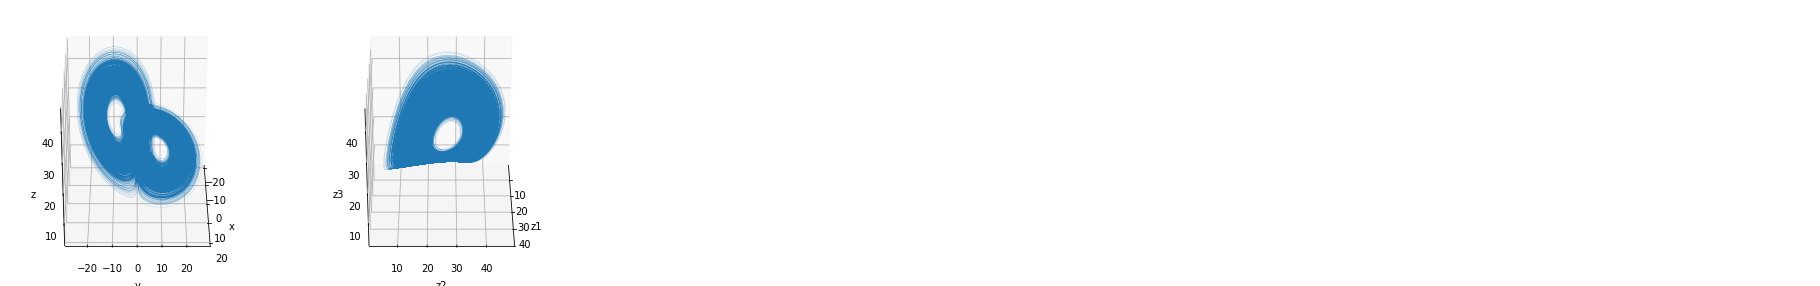

30


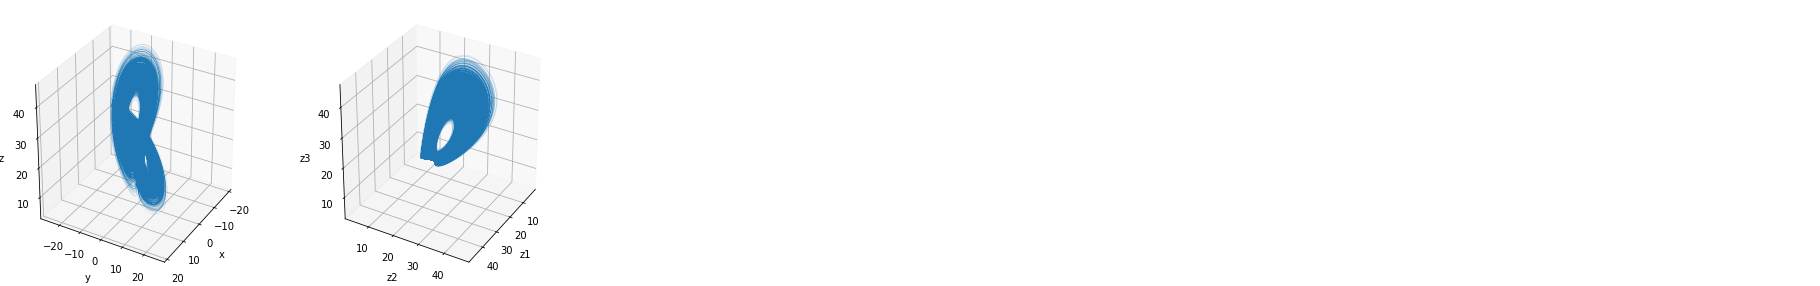

60


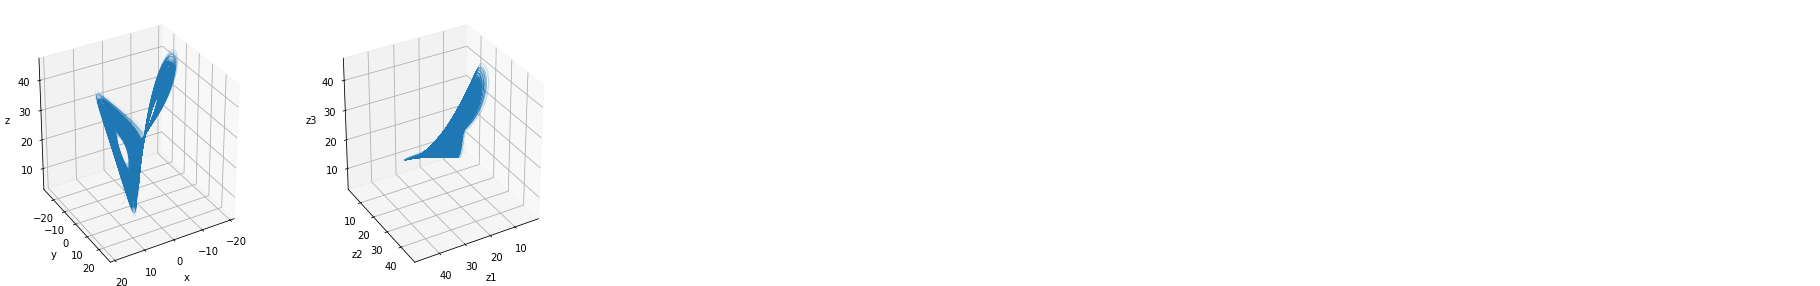

90


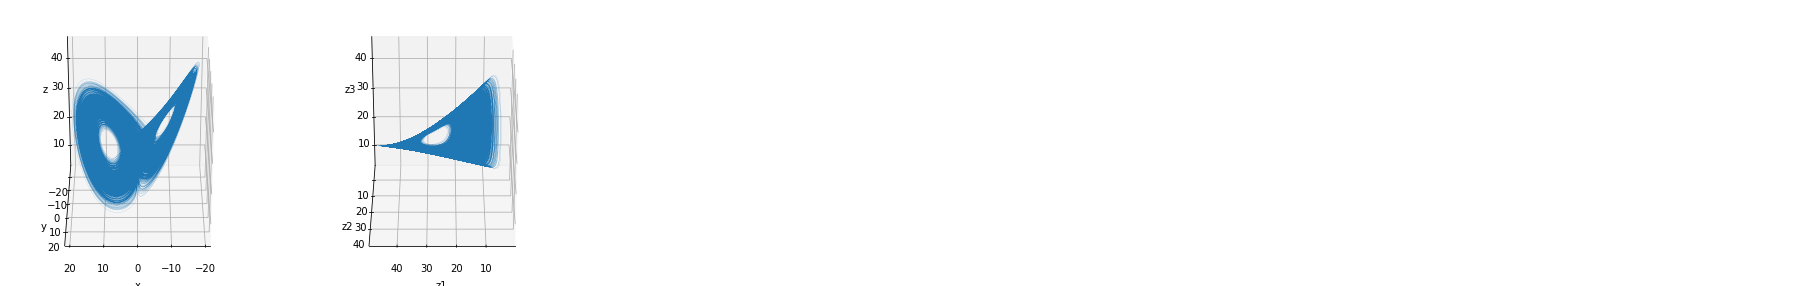

120


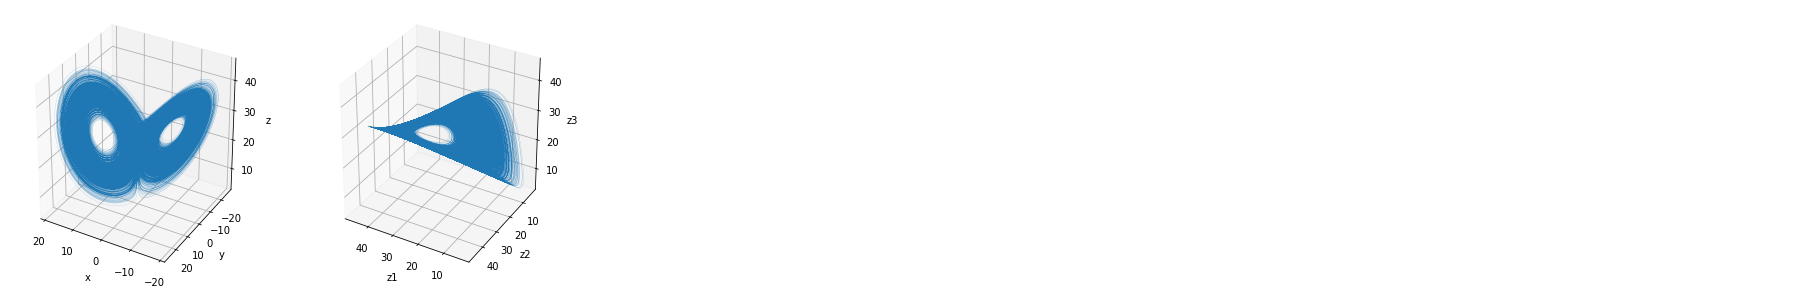

150


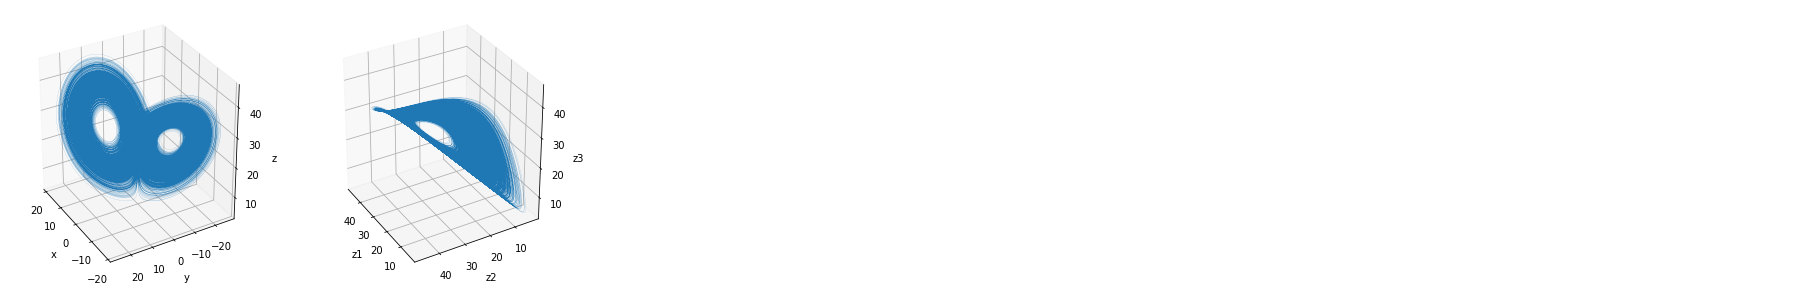

180


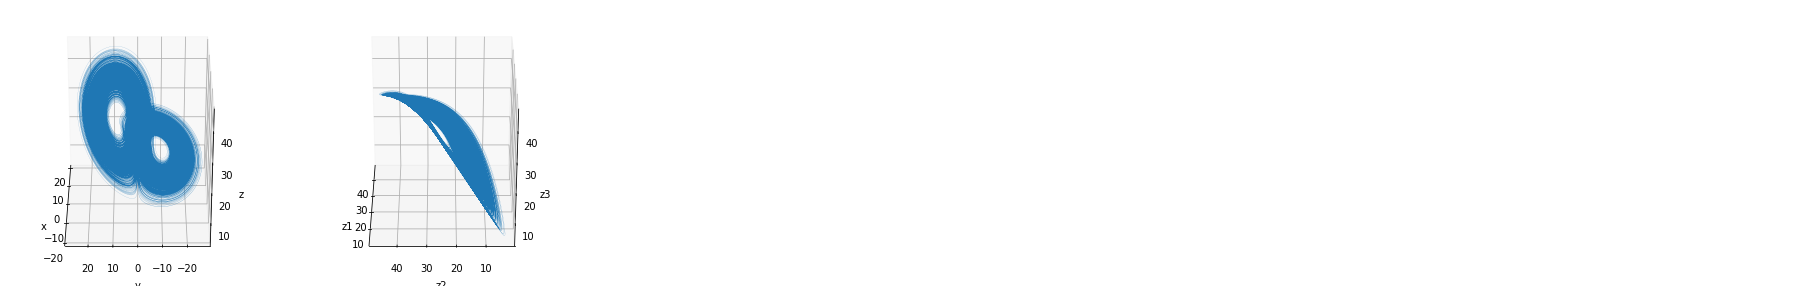

210


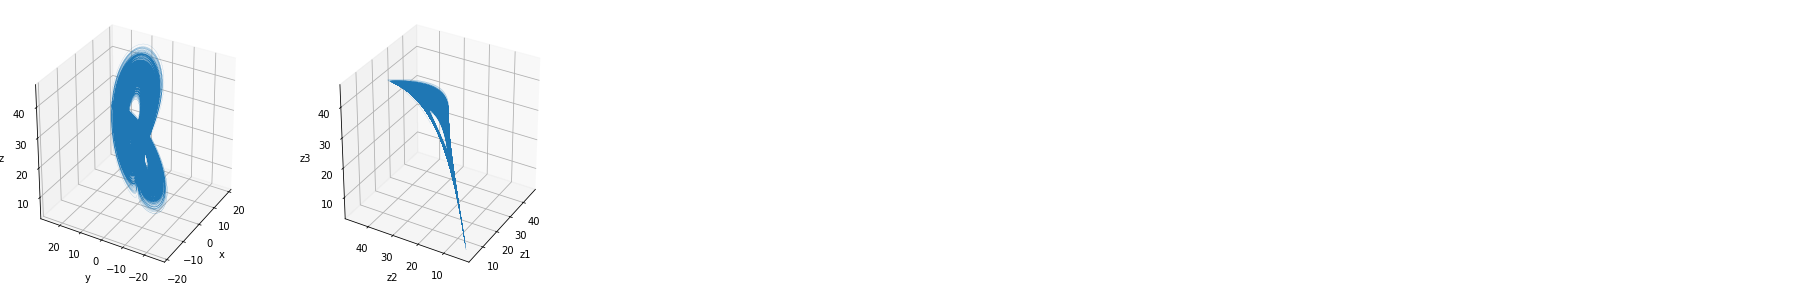

240


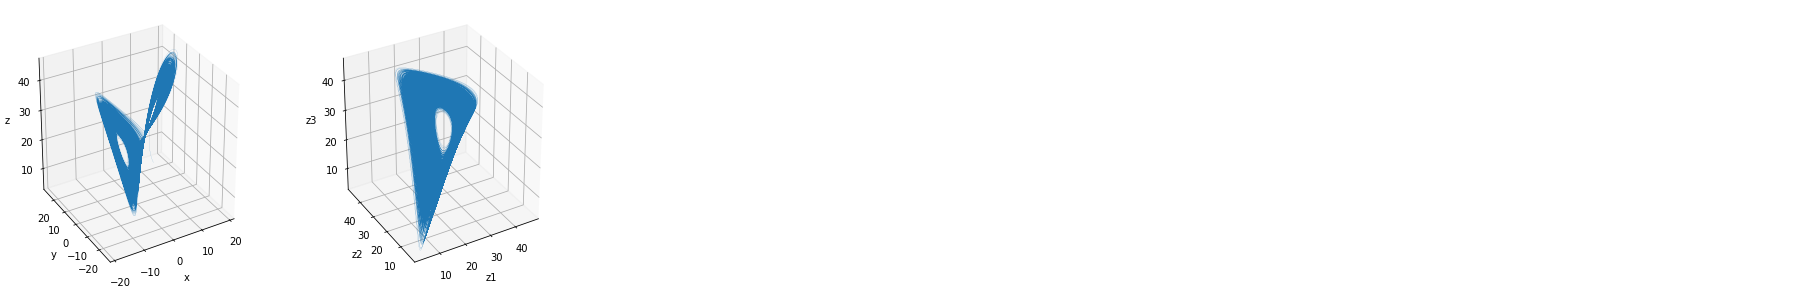

270


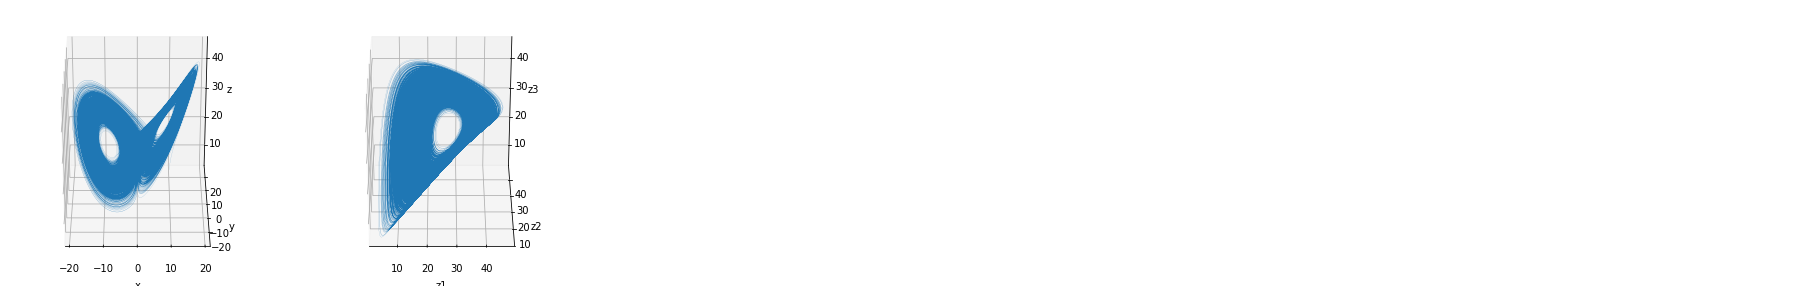

300


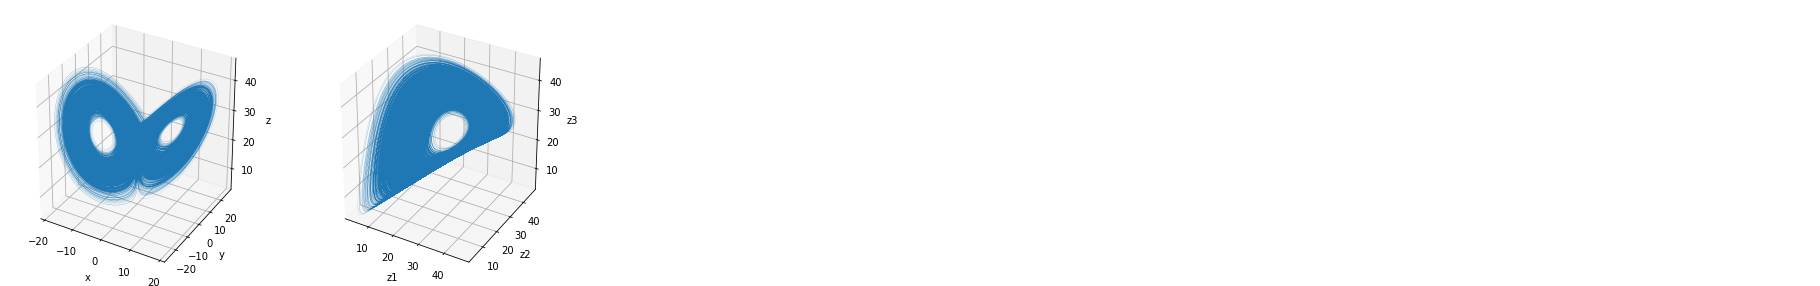

330


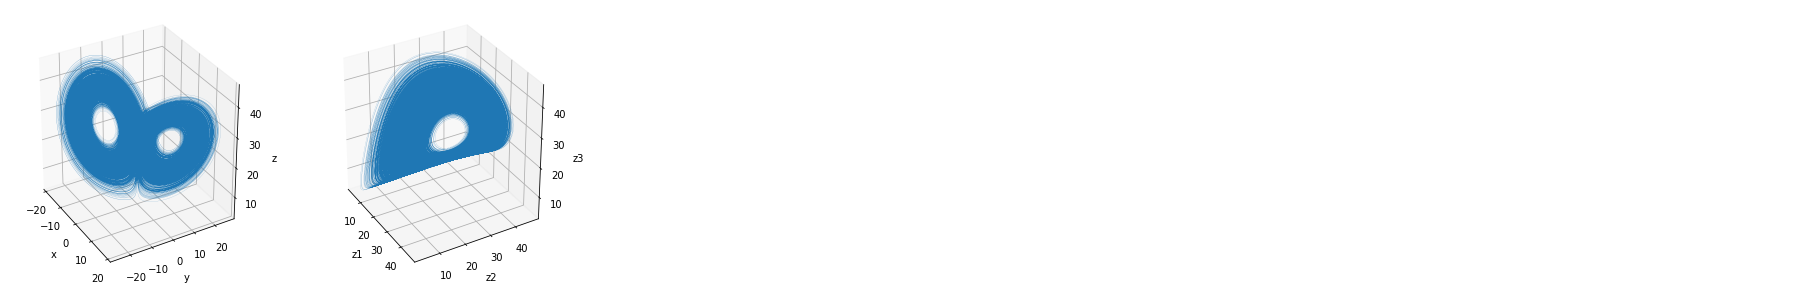

In [6]:
for angle in range(0, 360):
    if angle % 30 !=0: continue
    print(angle)
    # Original.
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(121, projection='3d')
    ax.view_init(30, angle)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.plot(sol.y[0], sol.y[1], sol.y[2], lw=0.1)
    
    #Time-delay.
    ax = fig.add_subplot(122, projection='3d')
    ax.view_init(30, angle)
    ax.set_xlabel("z1")
    ax.set_ylabel("z2")
    ax.set_zlabel("z3")
    ax.plot(z1, z2, z3, lw=0.1)
    
    plt.show()

# 3. Part three

## 3.1 Code from exercise 3

In [7]:
# Load the positions and number of steps for a given pedestrian.
def load_postvis(p_id, alpha):
    filename = './outputs/postvis_' +  str(alpha) + '.trajectories'
    with open(filename, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=' ')
        next(reader)
        t = []
        x = []
        y = []
        step = 0
        for row in reader:
            if (int(row[1])==p_id):
                step += 1
                t.append(step)
                x.append(float(row[2]))
                y.append(float(row[3]))
        return t, x , y

In [8]:
# Visualize the bifurcation for a given pedestrian, alpha and diff.
def visualize_bifurcation(pd_id, alpha, diff):
    t, x , y = load_postvis(pd_id, alpha)
    timeSteps = len(x)
    x1 = x[diff:]
    x2 = x[:timeSteps-diff]
    plt.figure(figsize=(5,5))
    plt.plot(x2, x1) 
    plt.xlabel('x', fontsize=14)
    plt.ylabel('x_old', fontsize=14)
    plt.title('Alpha: ' + str(alpha), fontsize=18)

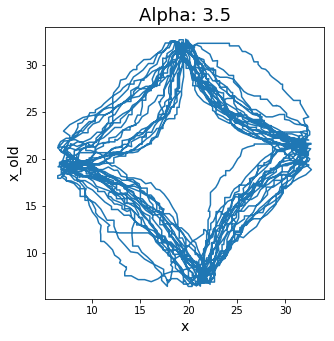

In [9]:
alpha = 3.5
visualize_bifurcation(3, alpha, 45)

## 3.2 Removing noise

In [10]:
# Retrieving the data
steps = 1500
_, x_list, _ = load_postvis(3, alpha)
x = np.array(x_list)
x = x[:steps]

P_list = []
for i in range(steps-200):
    p = []
    for j in range(200):
        p.append(x[i+j])
    P_list.append(p)

P = np.array(P_list)

(200, 200)


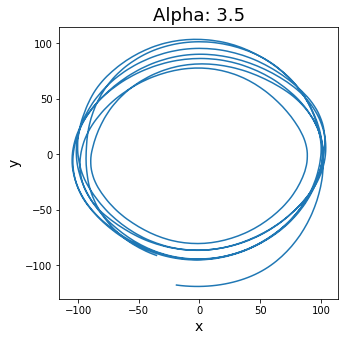

In [15]:
# Center data.
P = P - P.mean(axis=0)
# Apply SVD on the data matrix.
u, s, vh = np.linalg.svd(P, 0)
# Target dimensions.
d = 2
# Dimensionality reduction.
S = np.diag(s)
new_P = u[:,:d] @ S[:d,:d]

plt.figure(figsize=(5,5))
plt.plot(new_P[:,0], new_P[:,1]) 
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('Alpha: ' + str(alpha), fontsize=18)
plt.show()